# Importing Standard Libraries

In [1]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Importing Tables

In [2]:
rt_reviews_df = pd.read_csv('../Data/rt.reviews.tsv',
                           delimiter='\t',
                           encoding=('unicode_escape'))

In [3]:
tnmovie = pd.read_csv('../Data/tn.movie_budgets.csv', parse_dates = ['release_date'])

In [4]:
bom = pd.read_csv('../Data/bom.movie_gross.csv')

In [5]:
rt_movie_info = pd.read_csv('../Data/rt.movie_info.tsv',
                           delimiter = '\t')

# Importing SQL Database

In [6]:
conn = sqlite3.connect('../Data/im.db')

# List of SQL Tables

In [7]:
pd.read_sql('''
SELECT
    *
FROM
    sqlite_master

''',conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Formatting 'The Numbers' DB

In [9]:
tnmovie['worldwide_gross'] = tnmovie['worldwide_gross'].str.replace("\$|,|\.", '', regex = True).astype(int)

In [10]:
tnmovie['production_budget'] = tnmovie['production_budget'].str.replace("\$|,|\.", '', regex = True).astype(int)

# Creating 'Profit Column' from WWGross and Production Budget

In [11]:
tnmovie['profit'] = tnmovie['worldwide_gross'] - tnmovie['production_budget']

In [12]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


In [13]:
tnmovie = tnmovie.sort_values(by='profit',
                   ascending=False)

In [14]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,2351345279
42,43,1997-12-19,Titanic,200000000,"$659,363,944",2208208395,2008208395
6,7,2018-04-27,Avengers: Infinity War,300000000,"$678,815,482",2048134200,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,1747311220
33,34,2015-06-12,Jurassic World,215000000,"$652,270,625",1648854864,1433854864


In [15]:
tnmovie.shape

(5782, 7)

# Formatting Release Date to M/D format

In [16]:
tnmovie['release_date_month'] = tnmovie['release_date'].dt.strftime('%m/%d')

# Creating Release_Week, Month and Year Columns

In [17]:
tnmovie['release_week'] = tnmovie['release_date'].dt.strftime('%U')

In [59]:
tnmovie['release_month'] = tnmovie['release_date'].dt.strftime('%m')

In [63]:
tnmovie['release_year'] = tnmovie['release_date'].dt.strftime('%Y')

In [64]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_date_month,release_week,release_month,release_year
5455,56,1991-01-01,Johnny Suede,500000,"$55,000",55000,-445000,01/01,00,01,1991
4803,4,1987-01-01,Maurice,2600000,"$3,147,950",3198308,598308,01/01,00,01,1987
3506,7,1970-01-01,The Molly Maguires,11000000,"$2,200,000",2200000,-8800000,01/01,00,01,1970
3909,10,1991-01-01,Showdown in Little Tokyo,8000000,"$2,275,557",2275557,-5724443,01/01,00,01,1991
3507,8,1991-01-01,Return to the Blue Lagoon,11000000,"$2,000,000",2000000,-9000000,01/01,00,01,1991


In [41]:
tnmovie = tnmovie.sort_values(by='release_week',
                   )

In [42]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_date_month,release_week,release_month
5455,56,1991-01-01,Johnny Suede,500000,"$55,000",55000,-445000,01/01,00,00
4803,4,1987-01-01,Maurice,2600000,"$3,147,950",3198308,598308,01/01,00,00
3506,7,1970-01-01,The Molly Maguires,11000000,"$2,200,000",2200000,-8800000,01/01,00,00
3909,10,1991-01-01,Showdown in Little Tokyo,8000000,"$2,275,557",2275557,-5724443,01/01,00,00
3507,8,1991-01-01,Return to the Blue Lagoon,11000000,"$2,000,000",2000000,-9000000,01/01,00,00


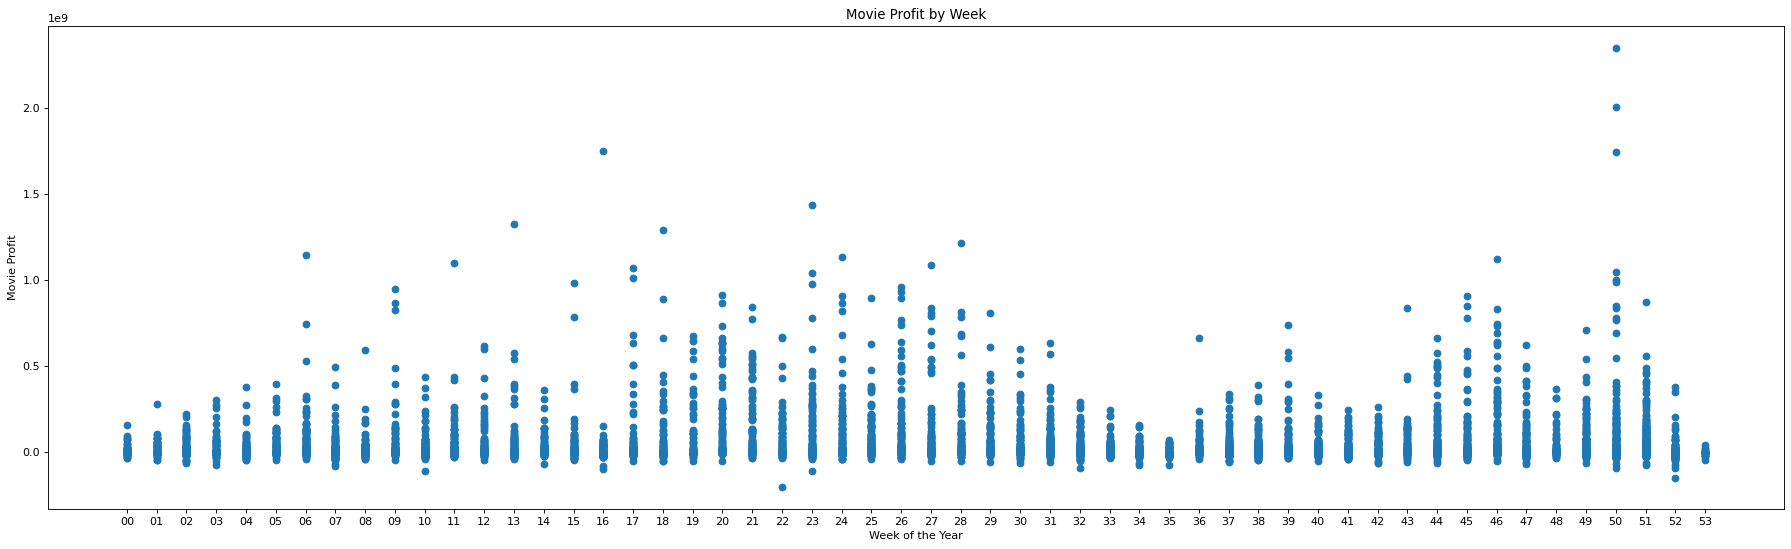

In [43]:

plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_week = plt.scatter(x = tnmovie['release_week'], y = tnmovie['profit'])
plt.title('Movie Profit by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Movie Profit')
plt.show();

Thoughts for tomorrow. Christmas 51, Thanksgiving 46, Chinese New Year 06, Late Spring 20.<br>
 Maybe could average the values for each week to make it more simple and readable.

# Import PANDASQL

In [44]:
from pandasql import sqldf

In [45]:
pysqldf = lambda q: sqldf(q, globals())

# Creation of Average Profit Weekly Column

In [47]:
q = '''SELECT release_week,
            AVG(profit) as Average_Profit_Weekly
       FROM tnmovie
       GROUP BY
           release_week;'''
tnmovies_pandas_weekly = pysqldf(q)
tnmovies_pandas_weekly

,release_week,Average_Profit_Weekly
0,00,1.311402e+07
1,01,2.283090e+07
2,02,2.988502e+07
3,03,3.245423e+07
4,04,1.914611e+07
5,05,4.449597e+07
6,06,7.565514e+07
7,07,3.091450e+07
8,08,2.520160e+07
9,09,6.997169e+07


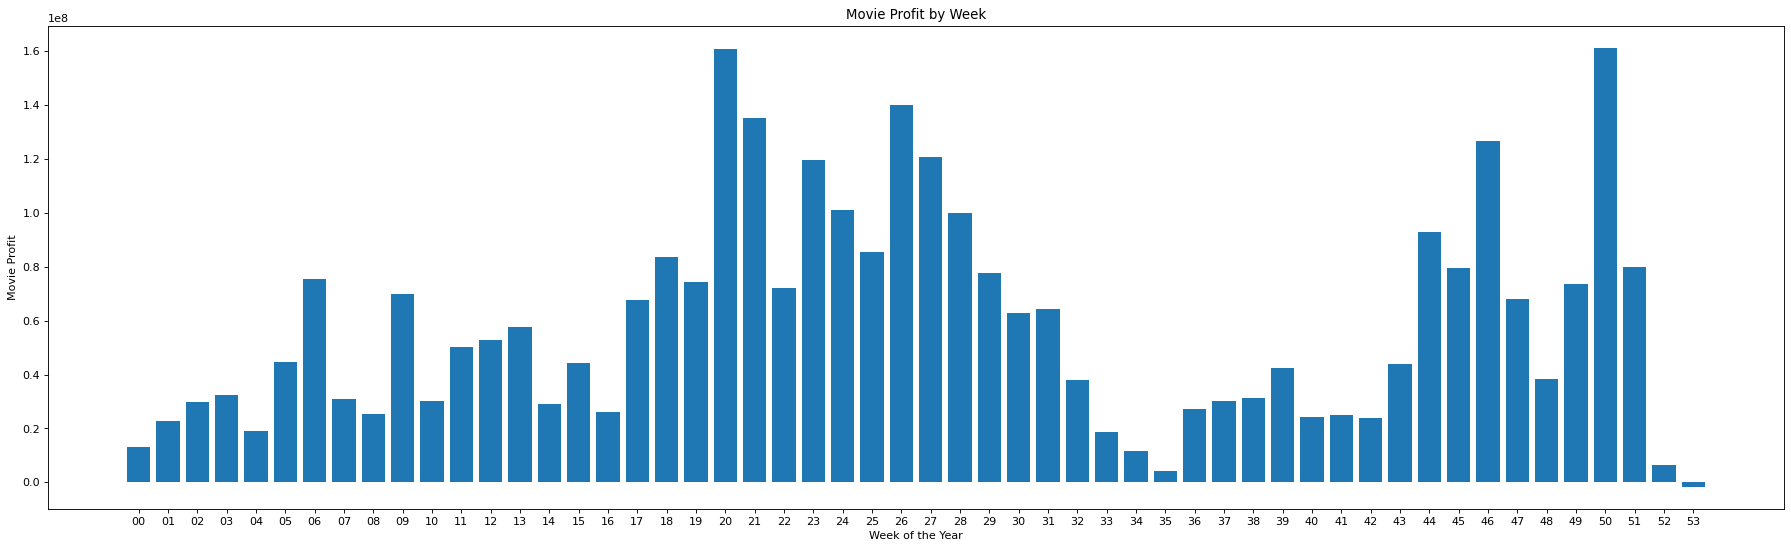

In [70]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_week = plt.bar(x = tnmovies_pandas_weekly['release_week'], height = tnmovies_pandas_weekly['Average_Profit_Weekly'])
plt.title('Movie Profit by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Movie Profit')
plt.show();

Maybe this visual would be easier read if it only contained months?

# Creation of Average Profit Monthly Column

In [61]:
q3 = '''SELECT release_month,
            AVG(profit) as Average_Profit_Monthly
       FROM tnmovie
       GROUP BY
           release_month;'''
tnmovies_pandas_monthly = pysqldf(q3)
tnmovies_pandas_monthly

,release_month,Average_Profit_Monthly
0,01,2.572033e+07
1,02,4.349811e+07
2,03,4.985129e+07
3,04,3.611743e+07
4,05,1.151328e+08
5,06,9.942391e+07
6,07,9.841746e+07
7,08,3.542232e+07
8,09,2.488078e+07
9,10,2.907190e+07


# Creation of Monthly Average Bar Graph

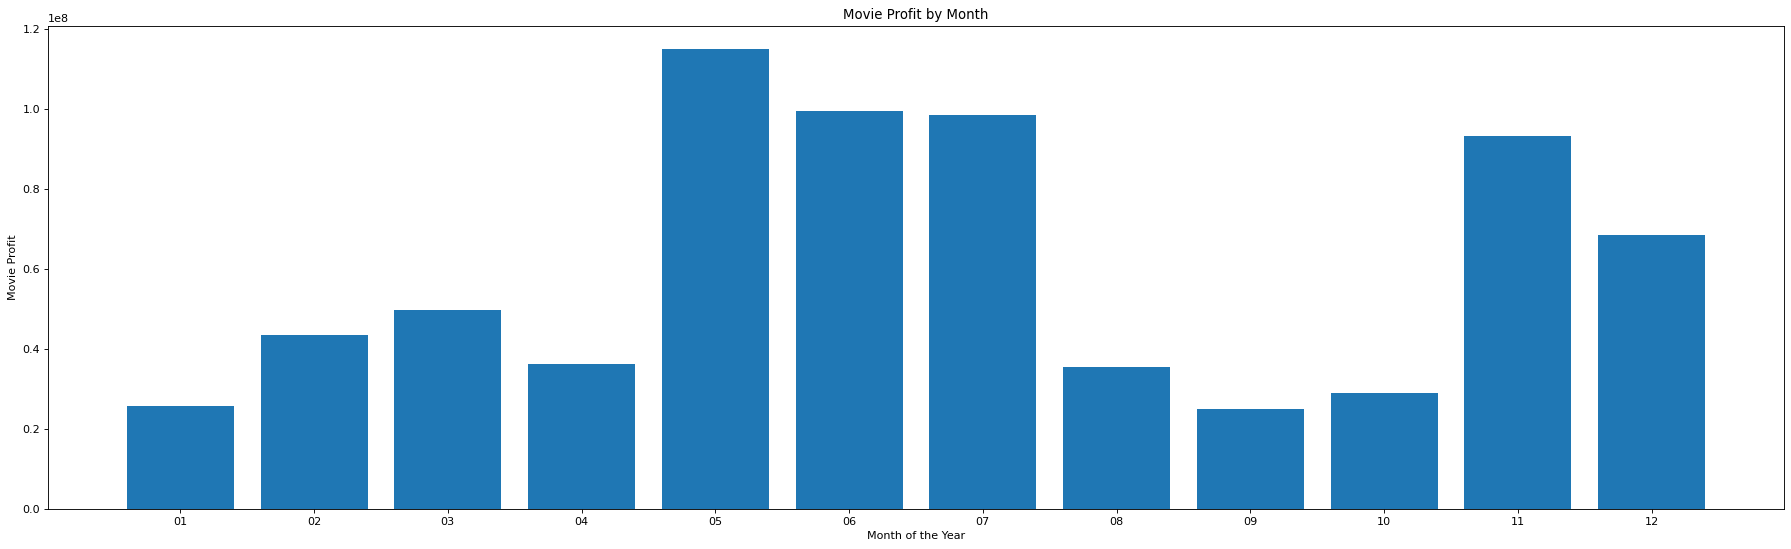

In [62]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_month = plt.bar(x = tnmovies_pandas_monthly['release_month'], height = tnmovies_pandas_monthly['Average_Profit_Monthly'])
plt.title('Movie Profit by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Movie Profit')
plt.show();

This graph is okay but starts to eliminate important data. December has the overall best release date of Christmas but then is immediately followed by the worst release days leading up to New Year and when you combine the two it hides these insights.

# Filtering to See Trends in the Last 10 Years

### Weekly data filtered by last 10 years

In [67]:
q4 = '''SELECT release_week,
            AVG(profit) as Average_Profit_Weekly
       FROM tnmovie
       WHERE
            release_year > 2008       
       GROUP BY
           release_week;'''
tnmovies_pandas_weekly_10_years = pysqldf(q4)
tnmovies_pandas_weekly_10_years

,release_week,Average_Profit_Weekly
0,00,3.867995e+07
1,01,3.329541e+07
2,02,4.546626e+07
3,03,4.287205e+07
4,04,3.371369e+07
5,05,4.989867e+07
6,06,1.128469e+08
7,07,6.129587e+07
8,08,1.850117e+07
9,09,1.237226e+08


### Monthly data filtered by last 10 years

In [69]:
q5 = '''SELECT release_month,
            AVG(profit) as Average_Profit_Monthly
       FROM tnmovie
       WHERE
           release_year > 2008
       GROUP BY
           release_month;'''
tnmovies_pandas_monthly_10_years = pysqldf(q5)
tnmovies_pandas_monthly_10_years

,release_month,Average_Profit_Monthly
0,01,4.105338e+07
1,02,6.218702e+07
2,03,6.793419e+07
3,04,5.852027e+07
4,05,1.257280e+08
5,06,1.197938e+08
6,07,1.241882e+08
7,08,4.719981e+07
8,09,3.412845e+07
9,10,4.021563e+07


# Creation of Weekly Release Profits Graph Filtered by Last 10 Years

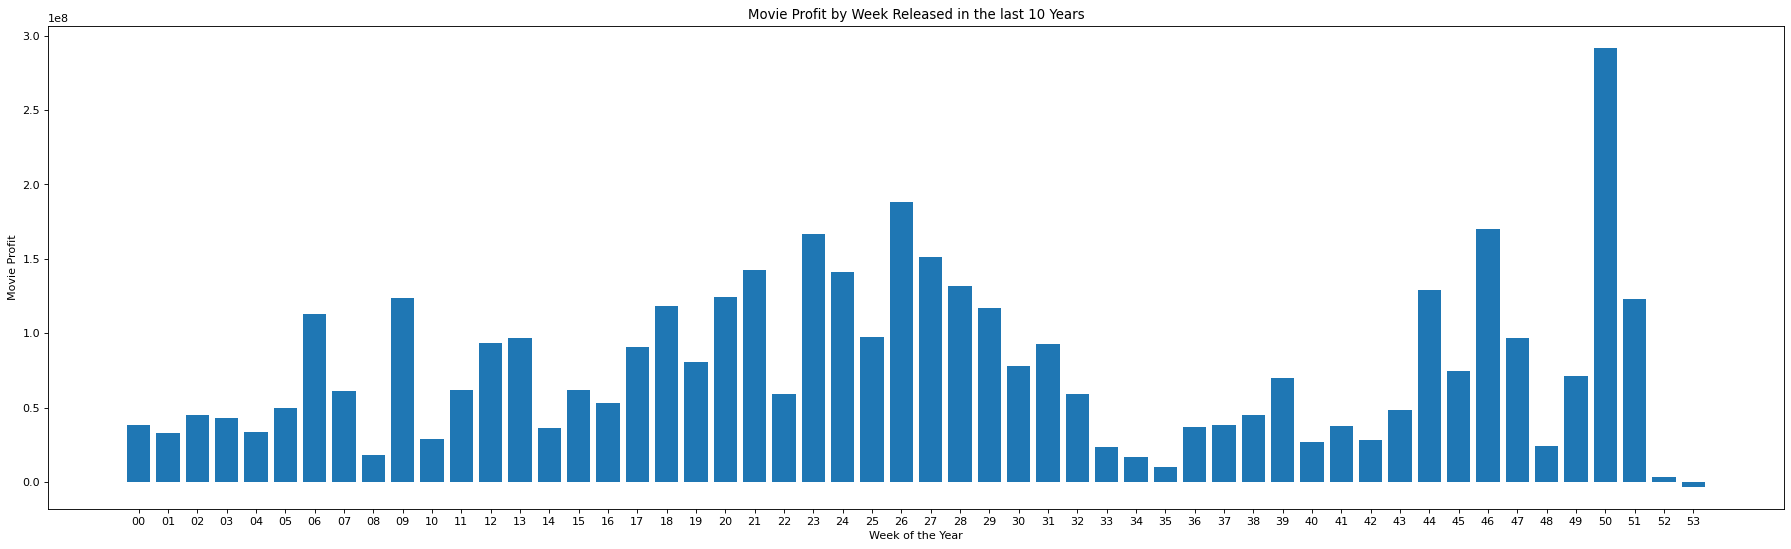

In [71]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_week_10_year = plt.bar(x = tnmovies_pandas_weekly_10_years['release_week'], height = tnmovies_pandas_weekly_10_years['Average_Profit_Weekly'])
plt.title('Movie Profit by Week Released in the last 10 Years')
plt.xlabel('Week of the Year')
plt.ylabel('Movie Profit')
plt.show();

# Creation of Monthly Release Profits Graph Filtered by Last 10 Years

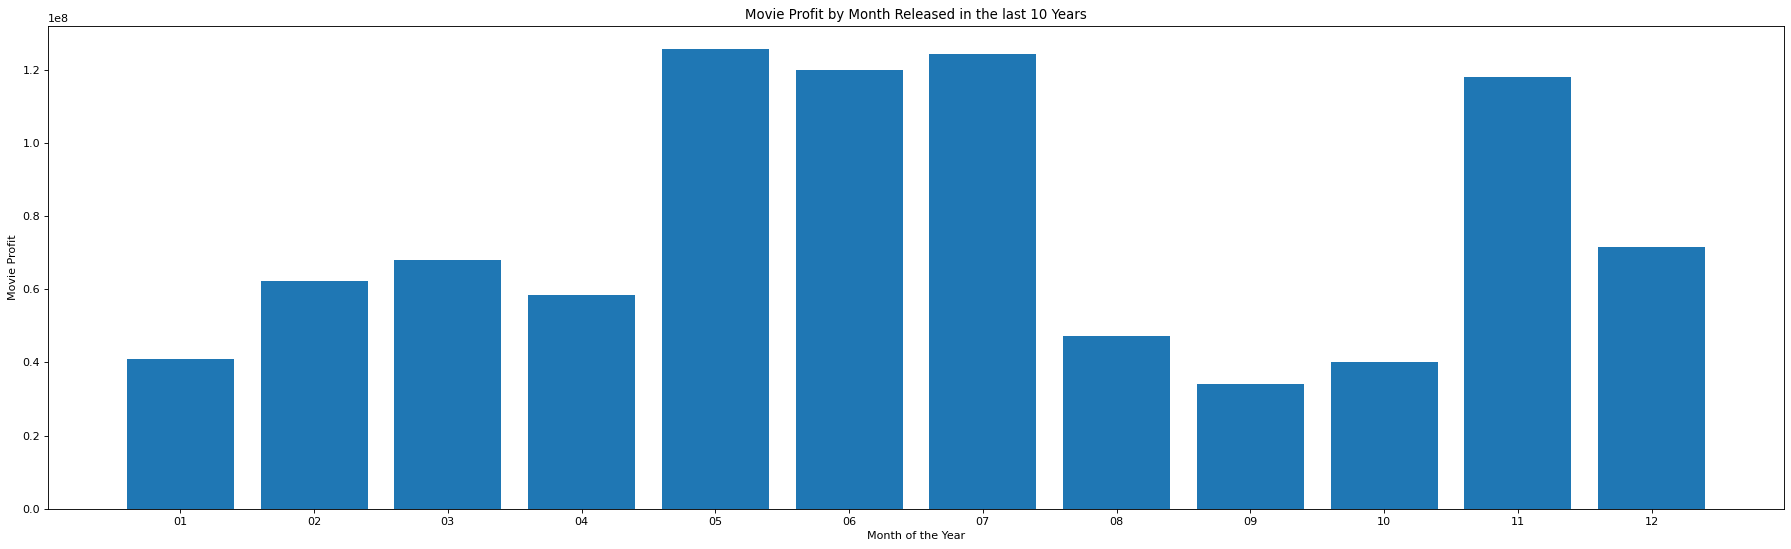

In [73]:
plt.figure(figsize=(28, 8), dpi=80)
movie_realease_by_month_10_year = plt.bar(x = tnmovies_pandas_monthly_10_years['release_month'], height = tnmovies_pandas_monthly_10_years['Average_Profit_Monthly'])
plt.title('Movie Profit by Month Released in the last 10 Years')
plt.xlabel('Month of the Year')
plt.ylabel('Movie Profit')
plt.show();